In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook
%config InlineBackend.figure_format='retina'

In light of what looks to be - finally - the year when central banks around the world start, albeit slowly, to reduce the sizes of their respective balance sheets, I have given a shot at somehow quantifying the possible impact of this reduction, while isolating it from the short term rates expectations over time.

In order to do so I have constructed and calibrated for a number of yield curves around the world an affine Interest Rate Model (multiple approaches exist in the literature, with obviously different results!) and tried to isolate the impact of the Quantitative Easing programmes in terms of ... the yields' term premiums: the excess return that an investor requires over N years over and above the average rolling short term risk free rate over the same period.

As other studies have noted, generally the term premium has been decreasing at a faster pace since 2008 (albeit with at times significant ups and downs along the way). The term premium, as expected, is still larger for longer maturities.

The chart below shows the 2y and the 10y term premiums for a number of markets (3M rolling averages), implied from zero rates backsolved via the swap curve (this approach is different than other studies). Notably, the term premium for 2y rates remains reasonably well anchored (also thanks to the forward guidance from many central banks).
Term premiums across geographies look also remarkably correlated.

<IPython.core.display.Javascript object>


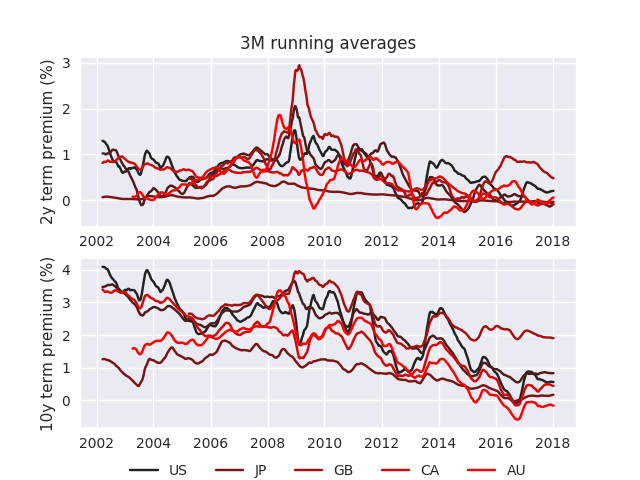

In [25]:
#importing data from files
tp10y = pd.read_pickle('tp10y.dat')
tp2y = pd.read_pickle('tp2y.dat')
tp10y_1qtr = tp10y.rolling(12).mean()
tp2y_1qtr = tp2y.rolling(12).mean()
sns.set()
sns.set_palette(sns.dark_palette('red'))
fig,ax = plt.subplots(2,1)
plt.sca(ax[0])
plt.title('3M running averages')
plt.ylabel('2y term premium (%)')
tp2y_1qtr.plot(ax=ax[0])
ax[0].legend_.remove()
plt.sca(ax[1])
plt.ylabel('10y term premium (%)')
tp10y_1qtr.plot(ax=ax[1])
ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),fancybox=True,shadow=True, ncol=5);

I have therefore regressed these term premiums with the log of the total balance sheets nominal size in USD (as the CB's impact on yields for the same purchased notional is logarithmic on yields).
...So one can at least work out - all else being equal - the relationship and envisage where this is heading.
Note that the sizes of the balance sheets and the respective log values (of the cumulative sum, to keep into account spillover effects) is also shown in the second picture that follows.

<IPython.core.display.Javascript object>


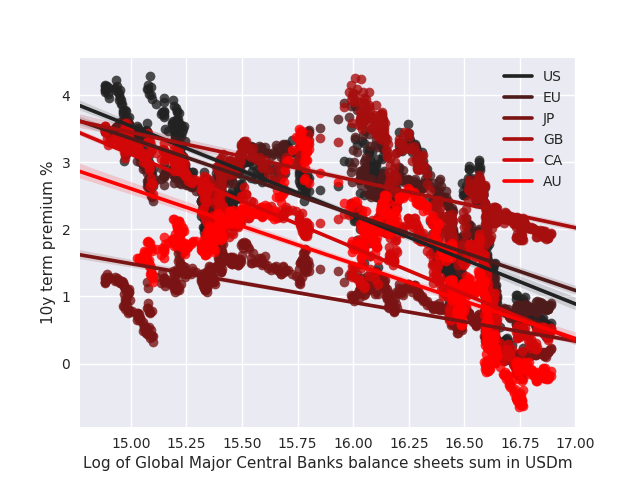

In [27]:
allcbbslog = pd.read_pickle('allcbbslog.dat')
uscbbs = pd.read_pickle('uscbbs.dat')
eucbbs_usd = pd.read_pickle('eucbbs_usd.dat')
jpcbbs_usd = pd.read_pickle('jpcbbs_usd.dat')
gbcbbs_usd = pd.read_pickle('gbcbbs_usd.dat')
cncbbs_usd = pd.read_pickle('cncbbs_usd.dat')
fig,ax = plt.subplots(1,1)
sns.regplot(allcbbslog, tp10y['US'])
sns.regplot(allcbbslog, tp10y['EU'])
sns.regplot(allcbbslog, tp10y['JP'])
sns.regplot(allcbbslog, tp10y['GB'])
sns.regplot(allcbbslog, tp10y['CA'])
sns.regplot(allcbbslog, tp10y['AU'])
plt.ylabel('10y term premium %')
plt.xlabel('Log of Global Major Central Banks balance sheets sum in USDm')
plt.legend(['US','EU','JP','GB','CA','AU']);

<IPython.core.display.Javascript object>


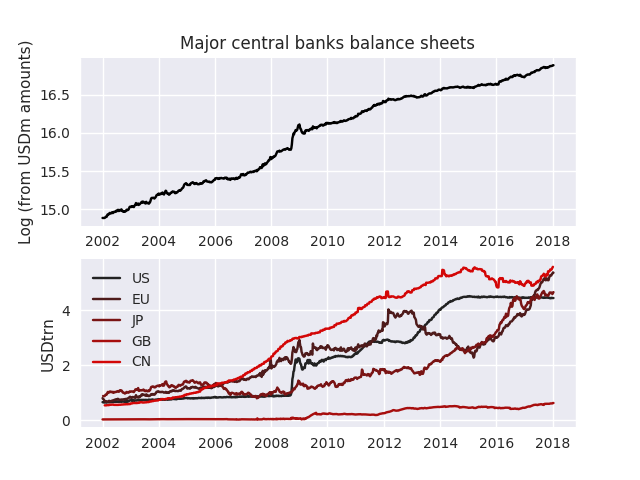

In [26]:
fig, ax = plt.subplots(2,1)
plt.sca(ax[0])
plt.title('Major central banks balance sheets')
allcbbslog.plot(color='k',grid=True, ax=ax[0])
plt.ylabel('Log (from USDm amounts)')
plt.sca(ax[1])
(uscbbs/1e6).plot()
(eucbbs_usd/1e6).plot()
(jpcbbs_usd/1e6).plot()
(gbcbbs_usd/1e6).plot()
(cncbbs_usd/1e6).plot()
plt.ylabel('USDtrn')
plt.legend(['US','EU','JP','GB','CN']);

From the charts above, it looks to me that (a) the term premium have remained reasonably stable over the last year or so, and in addition, any gentle unwind of the balance sheets by central banks this year and next will do not really much to "go back along the black line". Progressively, if and when the unwind will increase
pace and/or terminate in full, the term premium will increase substantially... but not so much based on these metrics. We can start debating about the "flow vs. stock effect" but that's for another story.
For example, regressing the 10y USD term premium over the global balance sheet log size will give an idea of the sensitivity of the term premium component. Then one can add their own expectations of short term average rate between now and 10y (easier said than done I know...):

In [41]:
cntry = ['US','EU','JP','GB','AU','CA']
slope_coeff = pd.DataFrame(index = cntry, columns=['Since 2002','Since 2013'])
for c in cntry:
    tmp = pd.concat([allcbbslog, tp10y[c]], axis=1)
    tmp2 = tmp.dropna()
    tmp_exna = tmp2
    A = np.ones((tmp_exna.shape[0],2))
    A[:,0] = tmp_exna['ALLCBBS'].values
    b = tmp_exna[c].values
    x,res,rank,s = np.linalg.lstsq(A,b,rcond=None)
    slope_coeff['Since 2002'].loc[c] = x[0]
    
    tmp_exna_2013 = tmp2.loc['2013-01-01':]
    A = np.ones((tmp_exna_2013.shape[0],2))
    A[:,0] = tmp_exna_2013['ALLCBBS'].values
    b = tmp_exna_2013[c].values
    x,res,rank,s = np.linalg.lstsq(A,b,rcond=None)
    slope_coeff['Since 2013'].loc[c] = x[0]
    
slope_coeff

,Since 2002,Since 2013
US,-1.32533,-4.83256
EU,-1.1322,-2.62746
JP,-0.576596,-1.74066
GB,-0.710196,-0.460314
AU,-1.11695,-3.66621
CA,-1.38758,-3.18159


So as visible from the coefficients, it takes quite a lot of "unwinding" to increase the term premium by 100bps if one considers the full history back to 2002. As far as we know, there is only one central bank in the world that is going to reduce the size of its balance sheet, while all the other ones are actually still increasing it for a few months at least and are quite away from actually reducing its size.

As this is a "long term" sensitivity since 2002, the regression above can also serve as guidance for shorter term sensitivities, which did appear to be larger (by a factor of 3).

Putting the above together with the expectation of a global economy that is increasingly heating up and that should push up short term rates, plus a mature cycle in the biggest global economy does not lead me to think that the yield curve will steepen much in 2018 and perhaps also in 2019.